# 這本 Jupyter Notebook demo 從 wandb 的雲端把實驗數據取回來

### 1. 取得指定 project 下的 log history [實驗用] 

In [1]:
import wandb

# 登錄到Weights & Biases
wandb.login()

# 設置你的項目
api = wandb.Api()


entity = "nchc"
project_name = "avg04_dyn_skf2c_20240611"

# 獲取所有run
runs = api.runs(f"{entity}/{project_name}")

# 列出所有run及其ID
for run in runs:
    print(f"Run ID: {run.id}, Name: {run.name}")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: waue-cs07 (nchc). Use `wandb login --relogin` to force relogin


Run ID: prn0scdy, Name: proud-water-2


In [7]:
import wandb
import pandas as pd
import yaml
from datetime import datetime

# 取代為你的 entity 名稱
entity = "nchc"

# 初始化 WandB API
api = wandb.Api()

# 欄位名稱列表
fields = ["mAP50", "AP50_car"]

# 取得該 entity 下的所有 projects
projects = ["mt01_avg_ck2b_so_20240506",
            "mt03_avg_ck2b_moon_20240506",
            "mt03_dyn_ck2b_20240607",
           ]

    
# 初始化一個空列表來儲存結果
dataframes = []

for project_name in projects:
    runs = api.runs(f"{entity}/{project_name}")
    history = runs[0].history()
    df = history[["_step", "AP50_car"]]
    df.columns = ["_step", f"{project_name}"]
    dataframes.append(df)

# Merge dataframes on "_step" column
merged_df = pd.DataFrame({"_step": dataframes[0]["_step"]})
for df in dataframes:
    merged_df = pd.merge(merged_df, df, on="_step", how="outer")

merged_df

,_step,mt01_avg_ck2b_so_20240506,mt03_avg_ck2b_moon_20240506,mt03_dyn_ck2b_20240607
0,0,44.469664,44.241555,49.318027
1,1,45.576905,41.751438,47.501046
2,2,39.810457,41.655434,49.252781
3,3,44.060075,41.292004,51.770890
4,4,34.599894,29.670320,43.243495
5,5,35.718956,32.511002,46.488496
6,6,36.419563,37.341422,53.129978
7,7,32.426221,30.295150,47.889021
8,8,36.550754,40.223873,48.622551
9,9,41.297953,40.074466,42.362164


### 2. 取得run的 detail 

In [2]:
import wandb
import pandas as pd
# define run_id_path
entity = "nchc"
project_name = "avg04_dyn_skf2c_20240611"
run_id = "prn0scdy"

# 登錄到Weights & Biases
wandb.login()
api = wandb.Api()

# 注意這裡是 api.run()
run = api.run(f"{entity}/{project_name}/{run_id}")
history=run.history()
# pandas dataframe
df = pd.DataFrame(history)
df

,_runtime,AP50_truck,mAP75,AP50_bus,AP50_person,AP50_motorcycle,AP50_car,AP50_train,_step,_timestamp,AP50_bicycle,mAP50,AP50_rider
0,2339.456311,1.850095,2.546833,0.381911,15.989122,5.595775,43.371715,0.000000,0,1.718086e+09,10.134766,11.691473,16.208399
1,4132.993571,12.137226,7.053278,13.554728,26.615124,11.791177,50.253270,4.229780,1,1.718088e+09,25.653267,22.461405,35.456673
2,5920.626679,11.199415,10.665227,28.039572,31.714376,13.555364,53.297536,4.902838,2,1.718090e+09,31.279831,26.679155,39.444305
3,7726.008495,13.585032,13.202453,30.494663,31.662878,23.050429,52.831960,5.963151,3,1.718092e+09,33.949752,29.215857,42.188989
4,9533.718539,12.768597,12.980970,29.194958,31.126498,25.291276,51.814467,13.554217,4,1.718093e+09,35.026106,29.905316,40.466407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,137737.282423,11.767560,5.574692,0.000000,30.763295,0.000000,49.243408,36.603759,85,1.718222e+09,0.000000,17.025917,7.829311
86,138929.408487,12.329614,5.689963,0.000000,32.120475,0.000000,53.160782,28.060856,86,1.718223e+09,0.000000,18.357663,21.189579
87,140120.005324,11.403205,4.531122,0.000000,30.343398,0.000000,48.326302,29.093093,87,1.718224e+09,0.000000,16.726005,14.642045
88,141304.833369,12.297762,4.966924,0.000000,30.770369,0.000000,48.931610,33.636364,88,1.718225e+09,0.000000,17.484511,14.239982


In [63]:
history[["_step","mAP50"]]

,_step,mAP50
0,0,11.691473
1,1,22.461405
2,2,26.679155
3,3,29.215857
4,4,29.905316
...,...,...
85,85,17.025917
86,86,18.357663
87,87,16.726005
88,88,17.484511


In [65]:
entity = "nchc"
project_name = "avg04_dyn_skf2c_20240611"
wandb.login()
api = wandb.Api()
## 注意這裡是 api.runs()
runs = api.runs(f"{entity}/{project_name}")
history=runs[0].history()
history[["_step","mAP50"]]

,_step,mAP50
0,0,11.691473
1,1,22.461405
2,2,26.679155
3,3,29.215857
4,4,29.905316
...,...,...
85,85,17.025917
86,86,18.357663
87,87,16.726005
88,88,17.484511


In [13]:
# parse each row 
if run.state == "finished":
    for i, row in run.history().iterrows():
      print(row["_timestamp"], row["mAP50"])

1718086303.7843037 11.691472813717752
1718088097.3215642 22.46140543686237
1718089884.954672 26.679154649145488
1718091690.3364882 29.215856722867972
1718093498.0465324 29.905315869936054
1718095303.1009057 30.117887818144325
1718097112.919804 31.99134596904789
1718098919.9323099 34.41496728503441
1718100729.1045454 35.94988518142515
1718102518.6937468 36.241313249648584
1718104285.6418602 3.702684883674829
1718106016.2547798 4.499123474977399
1718107761.7679572 4.648822766693416
1718109501.8349283 4.977293588397271
1718111225.1677682 4.500315253730022
1718112946.4253914 5.381354832715686
1718114656.0102084 5.463466151965733
1718116377.1408703 5.4735394097210035
1718118098.703285 5.248413976246931
1718119815.563749 5.386605964090927
1718121046.5949495 7.039981711857468
1718122226.3965633 9.396391396048884
1718123427.0040312 11.923165963711346
1718124612.7508307 13.575848483995468
1718125803.6526413 13.95107511390621
1718126999.7330196 12.75185279355014
1718128176.5083292 14.76185160992

In [28]:
# 另一種parse each row 的方法
history = run.scan_history()
AP50_car = [row["AP50_car"] for row in history]
AP50_car

[43.37171516681456,
 50.25326971281927,
 53.297535959202094,
 52.831959530316894,
 51.81446744894852,
 49.64892791581734,
 53.32580289603599,
 54.466326689140566,
 53.32093020952753,
 55.220587015616,
 29.62147906939863,
 35.99298779981919,
 37.19058213354733,
 39.81834870717817,
 36.00252202984018,
 43.050838661725486,
 43.70772921572586,
 43.78831527776803,
 41.987311809975445,
 43.09284771272742,
 42.04247749788168,
 43.11319580928479,
 48.27392246764867,
 50.08226035345223,
 50.22347040855591,
 48.41375084837538,
 48.16032232301393,
 47.34606944348371,
 48.31495887387864,
 49.96324847869433,
 54.825131372105396,
 56.52307445210882,
 55.589778804859,
 57.614380557995595,
 57.95840381500631,
 56.21980865695484,
 57.74371155923625,
 55.84172493136148,
 57.16251007360778,
 54.01350108458407,
 39.64965459443221,
 44.244682041287845,
 41.93851894391337,
 46.12030087604242,
 47.08039375670337,
 46.178409311719406,
 46.90929752604228,
 48.83792474793688,
 45.70731184186497,
 46.42820467238

### 3. 搜尋整個entity 有多少 project

In [34]:
# 獲取所有run
projects = api.projects(entity)
[{'project_name': project.name} for project in projects]

[{'project_name': 'mt04_dyn_skf2c_20240611'},
 {'project_name': 'mt04_avg_skf2c_moon_20240611'},
 {'project_name': 'avg04_dyn_skf2c_20240611'},
 {'project_name': 'avg04_skf2c_moon_20240611'},
 {'project_name': 'ignore-mt04_dyn_skf2c_20240607'},
 {'project_name': 'mt03_dyn_ck2b_20240607'},
 {'project_name': 'avg03_dyn_ck2b_20240607'},
 {'project_name': 'ignore-avg04_dyn_skf2c_20240607'},
 {'project_name': 'mt03_inv_ck2b_debug_20240601'},
 {'project_name': 'testonly_avg03_adp_ck2b_20240522'},
 {'project_name': 'ignore-mt04_inv_skf2c_20240517'},
 {'project_name': 'mt03_inv_ck2b_20240517'},
 {'project_name': 'ignore-avg04_inv_skf2c_20240517'},
 {'project_name': 'avg03_inv_ck2b_20240517'},
 {'project_name': 'mt05_ma_ck2b_so_20240506'},
 {'project_name': 'mt01_avg_ck2b_so_20240506'},
 {'project_name': 'mt07_ma_ck2b_moon_20240506'},
 {'project_name': 'mt03_avg_ck2b_moon_20240506'},
 {'project_name': 'mt06_ma_skf2c_so_20240506'},
 {'project_name': 'ignore-mt04_avg_skf2c_moon_20240506'},
 {'pro

### 4. 遍訪所有 project 下的所有 有效的 runs

In [35]:

# 取得 project 列表
projects_list = api.projects(entity)
projects = [{'project_name': project.name} for project in projects_list]

# 初始化一個空的 DataFrame 來儲存所有 runs
all_runs_df = pd.DataFrame()

# 遍訪每個 project，取得其下的所有 runs
for project in projects:
    project_name = project['project_name']
    runs = wandb.Api().runs(f"{entity}/{project_name}")
    
    # 將每個 run 的資料轉換成字典列表
    runs_data = []
    for run in runs:
        run_data = {
            'run_id': run.id,
            'run_name': run.name,
            'project_name': project_name,
            'status': run.state,
            'created_at': run.created_at,
            # 你可以在這裡添加更多你感興趣的 run 屬性
        }
        runs_data.append(run_data)
    
    # 將這個 project's runs 的資料轉換成 DataFrame 並附加到 all_runs_df
    runs_df = pd.DataFrame(runs_data)
    all_runs_df = pd.concat([all_runs_df, runs_df], ignore_index=True)

In [36]:
all_runs_df

,run_id,run_name,project_name,status,created_at
0,8uswhodx,solar-river-1,mt04_dyn_skf2c_20240611,running,2024-06-13T07:23:00
1,8s3sxvvv,young-shadow-1,mt04_avg_skf2c_moon_20240611,running,2024-06-13T00:12:03
2,ynacoelp,iconic-blaze-1,avg04_dyn_skf2c_20240611,finished,2024-06-11T05:32:44
3,prn0scdy,proud-water-2,avg04_dyn_skf2c_20240611,finished,2024-06-11T05:32:44
4,8as9zsx9,stellar-smoke-1,avg04_skf2c_moon_20240611,finished,2024-06-11T05:31:46
...,...,...,...,...,...
152,33htr5a5,00,basic-intro,finished,2023-09-06T07:54:22
153,2l6nl6av,prime-fire-6,notebook-anomalib,crashed,2023-09-01T08:32:40
154,2afry837,trim-haze-5,notebook-anomalib,crashed,2023-09-01T06:49:59
155,3pjwgffd,lunar-vortex-4,notebook-anomalib,finished,2023-09-01T06:42:36


### 5. 遍歷所有project內的id 

In [38]:
import wandb
import pandas as pd

# 取代為你的 entity 名稱
entity = "nchc"
# 欄位名稱列表
fields = ["mAP50", "AP50_car", "AP50_bicycle", "AP50_truck", "AP50_person", "AP50_motorcycle", "AP50_bus", "AP50_train", "mAP75"]

# 初始化 WandB API
api = wandb.Api()

# 取得該 entity 下的所有 projects
projects = api.projects(entity=entity)

# 初始化一個空列表來儲存結果
results = []

# 遍歷每個 project
for project in projects:
    project_name = project.name
    runs = api.runs(f"{entity}/{project_name}")
    # 假設每個 project 只有一個 run
    if len(runs) == 1:
        run = runs[0]
        run_data = {"project_name": project_name}
        for field in fields:
            run_data[field] = run.summary.get(field, None)
        results.append(run_data)

# 將結果轉換為 pandas DataFrame
df = pd.DataFrame(results)

# 顯示 DataFrame
print(df)

                           project_name      mAP50   AP50_car  AP50_bicycle  \
0               mt04_dyn_skf2c_20240611  38.686465  60.254076     37.483285   
1          mt04_avg_skf2c_moon_20240611  40.221281  60.684340     37.114936   
2        ignore-mt04_dyn_skf2c_20240607  39.601357  59.660464     34.640249   
3                mt03_dyn_ck2b_20240607  25.513989  42.362164     29.109165   
4        ignore-mt04_inv_skf2c_20240517  39.443061  61.003620     37.293372   
5              mt05_ma_ck2b_so_20240506  24.159907  42.475403     26.065877   
6             mt01_avg_ck2b_so_20240506  24.629565  41.297953     27.567676   
7            mt07_ma_ck2b_moon_20240506  27.691653  45.822170     31.539288   
8           mt03_avg_ck2b_moon_20240506  23.638166  40.074466     27.291729   
9             mt06_ma_skf2c_so_20240506  34.246551  61.296373     34.911125   
10  ignore-mt04_avg_skf2c_moon_20240506  41.439047  60.740465     36.831224   
11           mt02_avg_skf2c_so_20240506  40.218847  

### 6. 特定檔名的爬取

In [43]:
import yaml

# 給定的 project name 列表
project_names = [
    "avg01_ck2b_so_20240411",
    "avg02_skf2c_so_20240408",
    "avg03_ck2b_moon_20240411",
    "avg03_dyn_ck2b_20240607",
    "avg03_inv_ck2b_20240517",
    "avg04_dyn_skf2c_20240611",
    "avg04_skf2c_moon_20240611",
    "ma01_ck2b_cla8_20240501",
    "ma02_skf2c_cla8_20240411",
    "ma03_ck2b_cla8_20240501",
    "ma04_skf2c_cla8_20240411",
    "mt01_avg_ck2b_so_20240506",
    "mt02_avg_skf2c_so_20240506",
    "mt03_avg_ck2b_moon_20240506",
    "mt03_dyn_ck2b_20240607",
    "mt03_inv_ck2b_20240517",
    "mt04_avg_skf2c_moon_20240611",
    "mt04_dyn_skf2c_20240611",
    "mt05_ma_ck2b_so_20240506",
    "mt06_ma_skf2c_so_20240506",
    "mt07_ma_ck2b_moon_20240506",
    "mt08_ma_skf2c_moon_20240501_fin04"
]

# 儲存到 YAML 檔案
with open("projects_config.yaml", "w") as f:
    yaml.dump(project_names, f)

In [44]:
import yaml

# 從 YAML 檔案讀取 project name 列表
with open("projects_config.yaml", "r") as f:
    project_names = yaml.load(f, Loader=yaml.FullLoader)

print(project_names)

['avg01_ck2b_so_20240411', 'avg02_skf2c_so_20240408', 'avg03_ck2b_moon_20240411', 'avg03_dyn_ck2b_20240607', 'avg03_inv_ck2b_20240517', 'avg04_dyn_skf2c_20240611', 'avg04_skf2c_moon_20240611', 'ma01_ck2b_cla8_20240501', 'ma02_skf2c_cla8_20240411', 'ma03_ck2b_cla8_20240501', 'ma04_skf2c_cla8_20240411', 'mt01_avg_ck2b_so_20240506', 'mt02_avg_skf2c_so_20240506', 'mt03_avg_ck2b_moon_20240506', 'mt03_dyn_ck2b_20240607', 'mt03_inv_ck2b_20240517', 'mt04_avg_skf2c_moon_20240611', 'mt04_dyn_skf2c_20240611', 'mt05_ma_ck2b_so_20240506', 'mt06_ma_skf2c_so_20240506', 'mt07_ma_ck2b_moon_20240506', 'mt08_ma_skf2c_moon_20240501_fin04']


In [53]:
import wandb
import pandas as pd
import yaml
from datetime import datetime

# 取代為你的 entity 名稱
entity = "nchc"

# 初始化 WandB API
api = wandb.Api()

# 欄位名稱列表
fields = ["mAP50", "AP50_car", "AP50_bicycle", "AP50_truck", "AP50_person", "AP50_motorcycle", "AP50_bus", "AP50_train", "mAP75"]

# # 取得該 entity 下的所有 projects
# projects = api.projects(entity=entity)
with open("projects_config.yaml", "r") as f:
    projects = yaml.load(f, Loader=yaml.FullLoader)

# 初始化一個空列表來儲存結果
results = []

# 指定某個porjects
for project_name in projects:
        runs = api.runs(f"{entity}/{project_name}")
        if len(runs) == 1:
            run = runs[0]
            run_data = {"project_name": project_name}
            for field in fields:
                run_data[field] = run.summary.get(field, None)
            results.append(run_data)
#         else:
#             print(f"{project_name}")

# 將結果轉換為 pandas DataFrame
df = pd.DataFrame(results)

# 顯示 DataFrame
df

,project_name,mAP50,AP50_car,AP50_bicycle,AP50_truck,AP50_person,AP50_motorcycle,AP50_bus,AP50_train,mAP75
0,avg01_ck2b_so_20240411,11.304975,42.642567,0.000000,7.001413,27.307968,0.000000,0.000000,0.000000,4.187462
1,avg02_skf2c_so_20240408,17.395464,50.918605,0.000000,16.030637,31.314174,0.000000,0.000000,27.685862,6.127128
2,avg03_ck2b_moon_20240411,10.730149,40.859968,0.000000,9.024164,26.597980,0.000000,0.000000,0.000000,3.858577
3,avg03_dyn_ck2b_20240607,11.166683,41.808602,0.000000,9.558526,26.888742,0.000000,0.000000,0.000000,4.217500
4,avg03_inv_ck2b_20240517,10.102703,41.044940,0.000000,6.170530,24.676194,0.000000,0.000000,0.000000,3.480562
5,avg04_dyn_skf2c_20240611,16.006077,50.677211,0.000000,12.307383,31.237384,0.000000,0.000000,19.390018,5.270750
6,avg04_skf2c_moon_20240611,16.023300,49.116359,0.000000,11.965891,32.827374,0.000000,0.000000,19.410783,5.272837
7,ma01_ck2b_cla8_20240501,26.533900,52.355522,25.788200,22.150524,32.092575,20.586485,24.368159,0.010955,12.024802
8,ma02_skf2c_cla8_20240411,19.086260,51.837085,0.000000,16.941835,32.365625,0.000000,0.000000,35.772292,6.537820
9,ma03_ck2b_cla8_20240501,26.163239,50.585884,24.591973,21.126736,31.843382,22.162879,24.753450,0.026129,11.899529


In [68]:
dataframes = []
with open("projects_config.yaml", "r") as f:
    projects = yaml.load(f, Loader=yaml.FullLoader)
    
for project_name in projects:
    runs = api.runs(f"{entity}/{project_name}")
    history = runs[0].history()
    df = history[["_step", "mAP50"]]
    df.columns = ["_step", f"{project_name}"]
    dataframes.append(df)

# Merge dataframes on "_step" column
merged_df = pd.DataFrame({"_step": dataframes[0]["_step"]})
for df in dataframes:
    merged_df = pd.merge(merged_df, df, on="_step", how="outer")

merged_df

,_step,avg01_ck2b_so_20240411,avg02_skf2c_so_20240408,avg03_ck2b_moon_20240411,avg03_dyn_ck2b_20240607,avg03_inv_ck2b_20240517,avg04_dyn_skf2c_20240611,avg04_skf2c_moon_20240611,ma01_ck2b_cla8_20240501,ma02_skf2c_cla8_20240411,...,mt02_avg_skf2c_so_20240506,mt03_avg_ck2b_moon_20240506,mt03_dyn_ck2b_20240607,mt03_inv_ck2b_20240517,mt04_avg_skf2c_moon_20240611,mt04_dyn_skf2c_20240611,mt05_ma_ck2b_so_20240506,mt06_ma_skf2c_so_20240506,mt07_ma_ck2b_moon_20240506,mt08_ma_skf2c_moon_20240501_fin04
0,0,7.434814,12.888438,NaN,5.031456,NaN,11.691473,9.274323,13.848815,36.997129,...,36.021938,23.933707,24.232431,24.791992,34.654569,35.634500,23.951596,33.127392,26.102330,32.891692
1,1,13.692906,22.315108,NaN,12.115571,NaN,22.461405,17.840164,25.521488,6.659852,...,37.754798,24.266868,24.968504,23.950456,39.110978,34.534459,23.334016,33.783667,26.513161,34.574812
2,2,14.460865,27.240122,NaN,14.576092,NaN,26.679155,24.303459,14.016136,14.009044,...,39.655940,23.913963,25.780844,25.257432,36.839983,37.848259,24.207116,34.540145,25.798235,33.591520
3,3,18.870210,28.648597,NaN,17.387168,NaN,29.215857,25.738977,26.254216,36.523348,...,40.632638,23.724097,26.568878,23.718073,39.169584,38.049615,22.043456,34.105778,25.934433,34.188986
4,4,16.763300,32.005824,NaN,20.189098,NaN,29.905316,29.017007,13.475485,6.306707,...,38.635186,22.432798,26.057162,23.992522,37.963241,34.788462,23.238513,33.436663,26.535814,32.192730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,23892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,23926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,23958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
merged_df.iloc[:90,:]

,_step,avg01_ck2b_so_20240411,avg02_skf2c_so_20240408,avg03_ck2b_moon_20240411,avg03_dyn_ck2b_20240607,avg03_inv_ck2b_20240517,avg04_dyn_skf2c_20240611,avg04_skf2c_moon_20240611,ma01_ck2b_cla8_20240501,ma02_skf2c_cla8_20240411,...,mt02_avg_skf2c_so_20240506,mt03_avg_ck2b_moon_20240506,mt03_dyn_ck2b_20240607,mt03_inv_ck2b_20240517,mt04_avg_skf2c_moon_20240611,mt04_dyn_skf2c_20240611,mt05_ma_ck2b_so_20240506,mt06_ma_skf2c_so_20240506,mt07_ma_ck2b_moon_20240506,mt08_ma_skf2c_moon_20240501_fin04
0,0,7.434814,12.888438,NaN,5.031456,NaN,11.691473,9.274323,13.848815,36.997129,...,36.021938,23.933707,24.232431,24.791992,34.654569,35.634500,23.951596,33.127392,26.102330,32.891692
1,1,13.692906,22.315108,NaN,12.115571,NaN,22.461405,17.840164,25.521488,6.659852,...,37.754798,24.266868,24.968504,23.950456,39.110978,34.534459,23.334016,33.783667,26.513161,34.574812
2,2,14.460865,27.240122,NaN,14.576092,NaN,26.679155,24.303459,14.016136,14.009044,...,39.655940,23.913963,25.780844,25.257432,36.839983,37.848259,24.207116,34.540145,25.798235,33.591520
3,3,18.870210,28.648597,NaN,17.387168,NaN,29.215857,25.738977,26.254216,36.523348,...,40.632638,23.724097,26.568878,23.718073,39.169584,38.049615,22.043456,34.105778,25.934433,34.188986
4,4,16.763300,32.005824,NaN,20.189098,NaN,29.905316,29.017007,13.475485,6.306707,...,38.635186,22.432798,26.057162,23.992522,37.963241,34.788462,23.238513,33.436663,26.535814,32.192730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,NaN,17.613604,NaN,NaN,NaN,17.025917,17.508602,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,86,NaN,17.430657,NaN,NaN,NaN,18.357663,15.656978,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,87,NaN,17.076670,NaN,NaN,NaN,16.726005,17.152212,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,88,NaN,18.515735,NaN,NaN,NaN,17.484511,15.161236,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


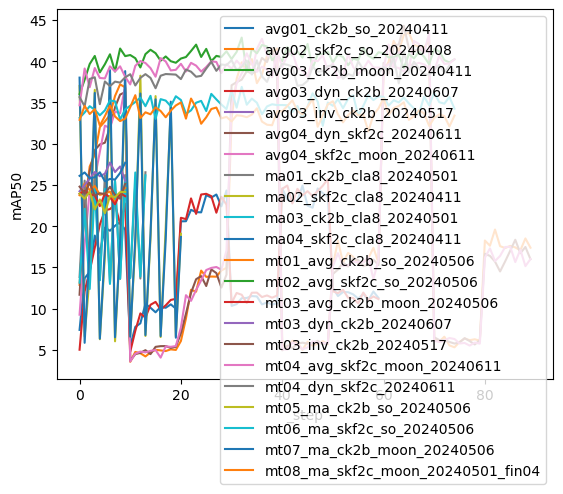

In [73]:
import matplotlib.pyplot as plt

# 假設你的 merged_df 已經包含了你想要的資料

ydata = merged_df.iloc[:90,:]

# 使用 _step 作為 x 軸，每個 project 的 mAP50 作為 y 軸
for column in ydata.columns[1:]:
    plt.plot(ydata["_step"], ydata[column], label=column)

plt.xlabel("_step")
plt.ylabel("mAP50")
plt.legend()
plt.show()

### 6 將多個實驗對齊來比對

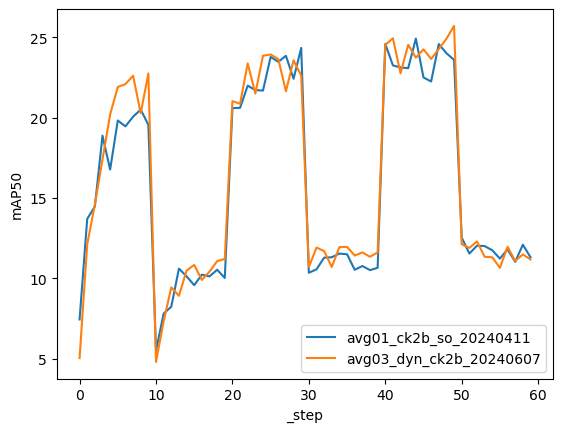

In [81]:
## 
dataframes = []
with open("projects_config.yaml", "r") as f:
    # projects = yaml.load(f, Loader=yaml.FullLoader)
    data = yaml.safe_load(f)
    ck2b_avg_projects = data.get('ck2b_avg', [])
    
for project_name in ck2b_avg_projects:
    runs = api.runs(f"{entity}/{project_name}")
    run_index = 0 if len(runs) == 1 else len(runs) - 1
        
    history = runs[0].history()
    df = history[["_step", "mAP50"]]
    df.columns = ["_step", f"{project_name}"]
    dataframes.append(df)

# Merge dataframes on "_step" column
merged_df = pd.DataFrame({"_step": dataframes[0]["_step"]})
for df in dataframes:
    merged_df = pd.merge(merged_df, df, on="_step", how="outer")

import matplotlib.pyplot as plt

# 假設你的 merged_df 已經包含了你想要的資料
#ydata = merged_df.iloc[:90,:]
ydata=merged_df

# 使用 _step 作為 x 軸，每個 project 的 mAP50 作為 y 軸
for column in ydata.columns[1:]:
    plt.plot(ydata["_step"], ydata[column], label=column)

plt.xlabel("_step")
plt.ylabel("mAP50")
plt.legend()
plt.show()